# Pattern Recognition Assignment 5

## Optical Recognition of Handwritten Digits

### Import Important Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

### Load Data

In [2]:
train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


### Split Features From Targets

In [4]:
X_train = train_data.drop(64, axis=1)
y_train = train_data[64]
X_test = test_data.drop(64, axis=1)
y_test = test_data[64]
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [5]:
y_train.head()

0    0
1    0
2    7
3    4
4    6
Name: 64, dtype: int64

### Show some Data Statistics

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3823 non-null   int64
 1   1       3823 non-null   int64
 2   2       3823 non-null   int64
 3   3       3823 non-null   int64
 4   4       3823 non-null   int64
 5   5       3823 non-null   int64
 6   6       3823 non-null   int64
 7   7       3823 non-null   int64
 8   8       3823 non-null   int64
 9   9       3823 non-null   int64
 10  10      3823 non-null   int64
 11  11      3823 non-null   int64
 12  12      3823 non-null   int64
 13  13      3823 non-null   int64
 14  14      3823 non-null   int64
 15  15      3823 non-null   int64
 16  16      3823 non-null   int64
 17  17      3823 non-null   int64
 18  18      3823 non-null   int64
 19  19      3823 non-null   int64
 20  20      3823 non-null   int64
 21  21      3823 non-null   int64
 22  22      3823 non-null   int64
 23  23      3823 

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int64
 1   1       1797 non-null   int64
 2   2       1797 non-null   int64
 3   3       1797 non-null   int64
 4   4       1797 non-null   int64
 5   5       1797 non-null   int64
 6   6       1797 non-null   int64
 7   7       1797 non-null   int64
 8   8       1797 non-null   int64
 9   9       1797 non-null   int64
 10  10      1797 non-null   int64
 11  11      1797 non-null   int64
 12  12      1797 non-null   int64
 13  13      1797 non-null   int64
 14  14      1797 non-null   int64
 15  15      1797 non-null   int64
 16  16      1797 non-null   int64
 17  17      1797 non-null   int64
 18  18      1797 non-null   int64
 19  19      1797 non-null   int64
 20  20      1797 non-null   int64
 21  21      1797 non-null   int64
 22  22      1797 non-null   int64
 23  23      1797 

In [8]:
labels = sorted(y_train.unique())
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
labels_values_count = y_train.value_counts()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


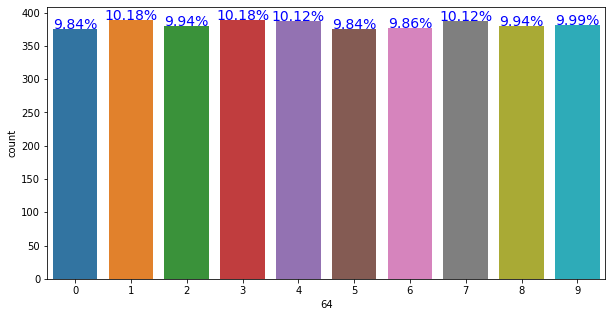

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(y_train)
for label in labels:
  percentage = f'{100 * labels_values_count[label] / len(y_train):.2f}%'
  plt.text(label, labels_values_count[label], str(percentage), ha='center', color='blue', fontsize=14)
plt.show()

## Data Preprocessing

### Standardized The Data

In [11]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)
X_train_standard

array([[ 0.        ,  0.80596144,  0.11189377, ..., -0.98708887,
        -0.52279362, -0.17574055],
       [ 0.        , -0.34761048,  0.97563908, ..., -0.64077209,
        -0.52279362, -0.17574055],
       [ 0.        , -0.34761048,  0.54376642, ..., -1.16024725,
        -0.52279362, -0.17574055],
       ...,
       [ 0.        , -0.34761048, -0.53591522, ...,  0.39817823,
        -0.52279362, -0.17574055],
       [ 0.        , -0.34761048,  0.11189377, ...,  1.61028695,
         0.71859769, -0.17574055],
       [ 0.        , -0.34761048, -0.75185155, ..., -1.16024725,
        -0.52279362, -0.17574055]])

### Build The Model

In [12]:
optimizer = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
epochs = 50
batch_size = 32

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(64,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train_standard, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
96/96 [==============================] - 5s 18ms/step - loss: 0.7222 - accuracy: 0.8195 - val_loss: 0.2194 - val_accuracy: 0.9333
Epoch 2/50
96/96 [==============================] - 1s 15ms/step - loss: 0.1290 - accuracy: 0.9657 - val_loss: 0.1229 - val_accuracy: 0.9660
Epoch 3/50
96/96 [==============================] - 2s 19ms/step - loss: 0.0731 - accuracy: 0.9801 - val_loss: 0.0970 - val_accuracy: 0.9752
Epoch 4/50
96/96 [==============================] - 1s 14ms/step - loss: 0.0438 - accuracy: 0.9905 - val_loss: 0.0980 - val_accuracy: 0.9752
Epoch 5/50
96/96 [==============================] - 2s 16ms/step - loss: 0.0313 - accuracy: 0.9925 - val_loss: 0.0768 - val_accuracy: 0.9817
Epoch 6/50
96/96 [==============================] - 1s 8ms/step - loss: 0.0206 - accuracy: 0.9961 - val_loss: 0.0744 - val_accuracy: 0.9843
Epoch 7/50
96/96 [==============================] - 1s 7ms/step - loss: 0.0141 - accuracy: 0.9990 - val_loss: 0.0804 - val_accuracy: 0.9830
Epoch 8/50
96/9

In [15]:
model.evaluate(X_test_standard, y_test)

57/57 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9610


[0.16920408606529236, 0.9610461592674255]

### Plot Training Curve

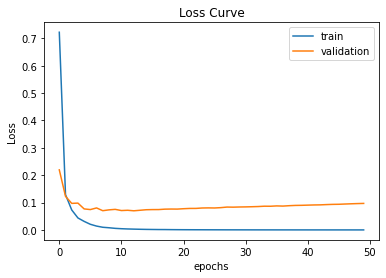

In [16]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Optimal Number For Training epochs is 15

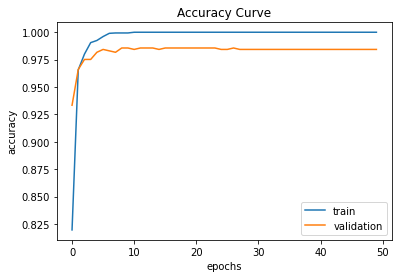

In [17]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()